# **Ajustes do DF**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_producao_total.csv', sep=',')
df.head()

,data,producao
0,1997-01-01,812324
1,1997-02-01,818768
2,1997-03-01,846938
3,1997-04-01,818238
4,1997-05-01,786930


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data      343 non-null    object
 1   producao  343 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [4]:
df['data'] = pd.to_datetime(df['data'])

df["data"] = df["data"].dt.to_period("M")
df = df.set_index("data")

In [5]:
df.head()

,producao
data,
1997-01,812324
1997-02,818768
1997-03,846938
1997-04,818238
1997-05,786930


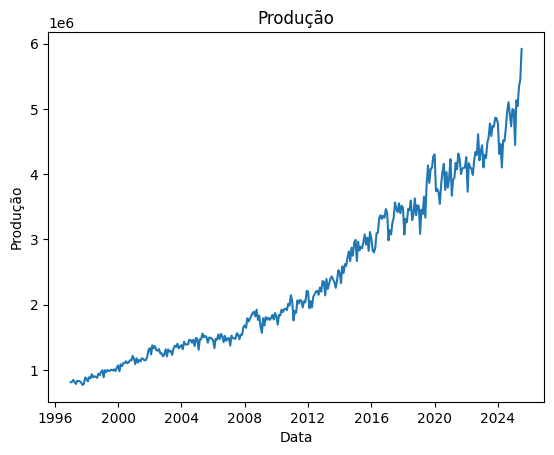

In [6]:
plt.plot(df.index.to_timestamp(), df['producao'])
plt.xlabel('Data')
plt.ylabel('Produção')
plt.title('Produção')
plt.show()

In [12]:
ts = df['producao']
ts['2004-05']

np.int64(1392775)

In [14]:
ts['2004-05':'2004-12']

,producao
data,
2004-05,1392775
2004-06,1390781
2004-07,1463457
2004-08,1457531
2004-09,1417593
2004-10,1464051
2004-11,1366916
2004-12,1492926


# **Decomposição**

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decomposicao = seasonal_decompose(ts, period=12)

In [23]:
tendencia = decomposicao.trend

In [24]:
#sozonalidade
sazonal = decomposicao.seasonal

In [25]:
#erro
aleatorio = decomposicao.resid

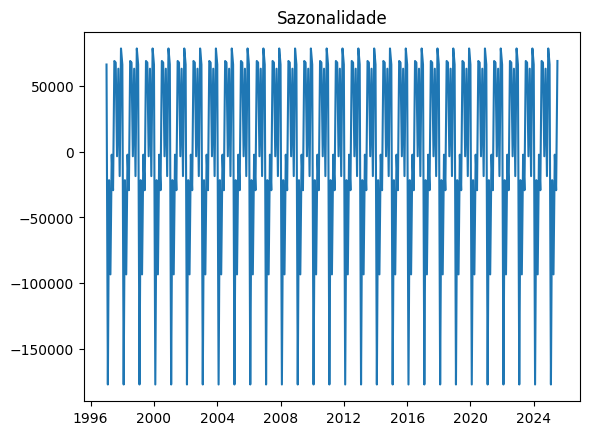

In [27]:
plt.plot(sazonal.index.to_timestamp(), sazonal)
plt.title('Sazonalidade')
plt.show()

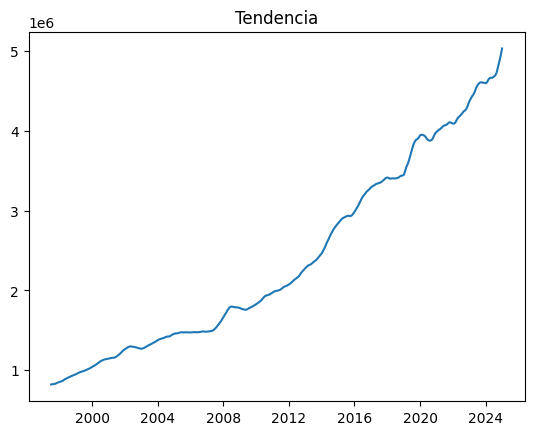

In [28]:
plt.plot(tendencia.index.to_timestamp(), tendencia)
plt.title('Tendencia')
plt.show()

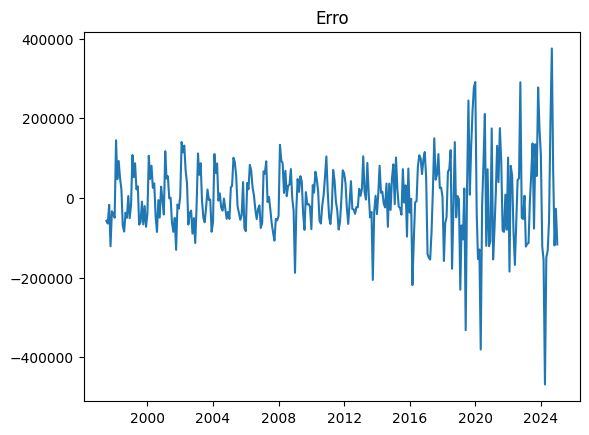

In [29]:
plt.plot(aleatorio.index.to_timestamp(), aleatorio)
plt.title('Erro')
plt.show()

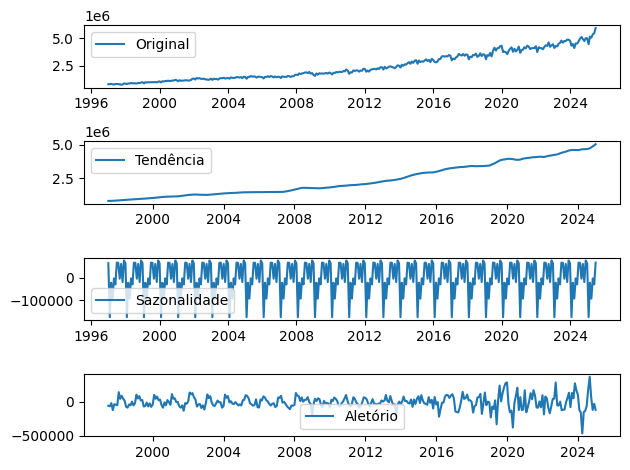

In [31]:
plt.subplot(4,1,1)
plt.plot(ts.index.to_timestamp(), ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia.index.to_timestamp(), tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal.index.to_timestamp(), sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio.index.to_timestamp(), aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()

# **Modelagem**

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing